In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data = pd.read_csv('D:\Business_Intellegence_on_Ed_Tech_data\online_All_Business_p1_p626.csv')
data.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640,INR,"₹8,640"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9447 non-null   int64  
 1   title                         9447 non-null   object 
 2   url                           9447 non-null   object 
 3   is_paid                       9447 non-null   bool   
 4   num_subscribers               9447 non-null   int64  
 5   avg_rating                    9447 non-null   float64
 6   avg_rating_recent             9447 non-null   float64
 7   rating                        9447 non-null   float64
 8   num_reviews                   9447 non-null   int64  
 9   is_wishlisted                 9447 non-null   bool   
 10  num_published_lectures        9447 non-null   int64  
 11  num_published_practice_tests  9447 non-null   int64  
 12  created                       9447 non-null   object 
 13  pub

In [7]:
#Data Cleaning#
data.shape

(9447, 20)

In [8]:
#Here we find null Values
data.isnull().sum()

id                                0
title                             0
url                               0
is_paid                           0
num_subscribers                   0
avg_rating                        0
avg_rating_recent                 0
rating                            0
num_reviews                       0
is_wishlisted                     0
num_published_lectures            0
num_published_practice_tests      0
created                           0
published_time                    0
discount_price__amount          510
discount_price__currency        510
discount_price__price_string    510
price_detail__amount              0
price_detail__currency            0
price_detail__price_string        0
dtype: int64

In [9]:
#The are total of 510 discount given out of 9447 as shown above.
data['discount_price__currency'].nunique()

1

In [10]:
#There are only one type of currency so we can drop two collumns :
#discount_price__price_string
#price_detail__price_string
#These two are duplicate and string format.

data.drop(['discount_price__price_string','price_detail__price_string'],axis = 1,inplace= True)

In [11]:
data.drop(['url', 'discount_price__currency','price_detail__currency'], axis=1, inplace=True)

In [12]:
#We can also remove url and currency as all are in IND.

data['id'].nunique()

9447

In [13]:
#Now we can say that all the id's are unique.

data.drop('rating',axis = 1, inplace = True)

In [14]:
#We removed rating as Rating and Average Recent Rating are the same columns in the provided dataset.

data.isna().sum()

id                                0
title                             0
is_paid                           0
num_subscribers                   0
avg_rating                        0
avg_rating_recent                 0
num_reviews                       0
is_wishlisted                     0
num_published_lectures            0
num_published_practice_tests      0
created                           0
published_time                    0
discount_price__amount          510
price_detail__amount              0
dtype: int64

In [15]:
data.fillna(0,inplace= True)

In [16]:
data.isna().sum()

id                              0
title                           0
is_paid                         0
num_subscribers                 0
avg_rating                      0
avg_rating_recent               0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
created                         0
published_time                  0
discount_price__amount          0
price_detail__amount            0
dtype: int64

In [17]:
#Date

data['created'] = pd.to_datetime(data['created'])
data['published_time'] = pd.to_datetime(data['published_time'])
data['Year']  = data['published_time'].dt.year

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            9447 non-null   int64              
 1   title                         9447 non-null   object             
 2   is_paid                       9447 non-null   bool               
 3   num_subscribers               9447 non-null   int64              
 4   avg_rating                    9447 non-null   float64            
 5   avg_rating_recent             9447 non-null   float64            
 6   num_reviews                   9447 non-null   int64              
 7   is_wishlisted                 9447 non-null   bool               
 8   num_published_lectures        9447 non-null   int64              
 9   num_published_practice_tests  9447 non-null   int64              
 10  created                       9447 n

In [19]:
data['diff_published_and_creation'] = data['published_time'] - data['created']

In [21]:
data['diff_published_and_creation'] = (data['published_time'] - data['created']).dt.total_seconds() / 60


#We have converted the difference between date in to minutes

In [22]:
data.loc[(data['diff_published_and_creation'] < 0)]

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,Year,diff_published_and_creation
686,2762,Simple Strategy for Swing Trading the Stock Ma...,True,2268,4.21642,4.22936,674,False,8,0,2010-04-14 21:32:46+00:00,2010-04-14 16:32:46+00:00,468.0,2560,2010,-300.0


In [23]:
#We can see that there is only one data whose date difference is negative so we have to drop the value.
data.drop(data[data['diff_published_and_creation'] < 0].index,inplace= True)

In [24]:
data.drop('diff_published_and_creation',axis=1,inplace=True)

In [25]:
data['created']  = pd.to_datetime(data['created'].to_list()).strftime('%m/%d/%Y').values
data['published_time']  = pd.to_datetime(data['published_time'].to_list()).strftime('%m/%d/%Y').values
data.head()

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,Year
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,False,84,0,02/14/2016,04/06/2016,455.0,8640,2016
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,False,78,0,08/22/2016,08/23/2016,455.0,8640,2016
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,False,292,2,09/26/2017,11/14/2017,455.0,8640,2017
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,False,338,0,10/23/2015,01/21/2016,455.0,8640,2016
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,False,83,0,10/12/2015,01/11/2016,455.0,8640,2016


<AxesSubplot:xlabel='avg_rating'>

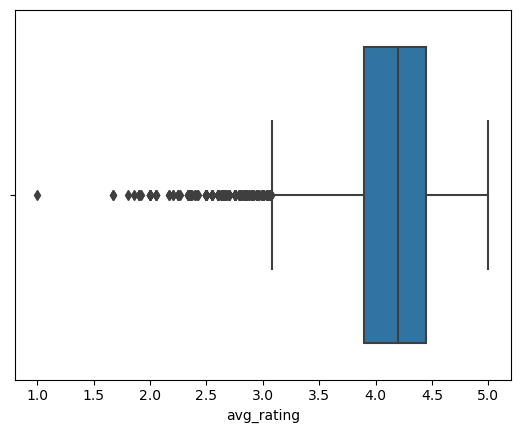

In [26]:
#EDA

sns.boxplot(x =data['avg_rating'] )

In [27]:
(data[data['avg_rating'] < 3]).count()

id                              177
title                           177
is_paid                         177
num_subscribers                 177
avg_rating                      177
avg_rating_recent               177
num_reviews                     177
is_wishlisted                   177
num_published_lectures          177
num_published_practice_tests    177
created                         177
published_time                  177
discount_price__amount          177
price_detail__amount            177
Year                            177
dtype: int64

In [28]:
data.drop(data[data['avg_rating'] < 3].index,inplace= True)

In [29]:
data.shape

(9269, 15)

In [30]:
data['rating_binned'] = pd.cut(data['avg_rating_recent'], [0,1,2,3,4,5])

<AxesSubplot:xlabel='rating_binned', ylabel='num_subscribers'>

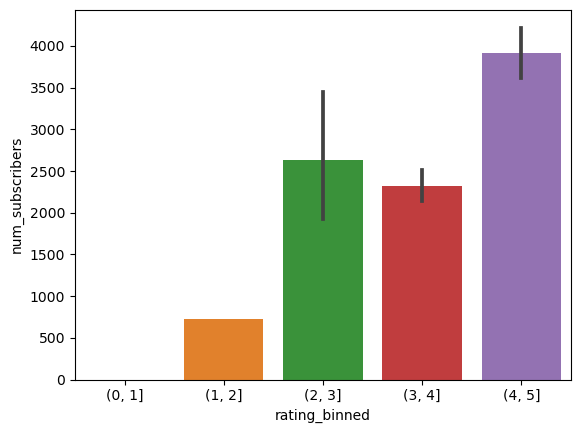

In [31]:
sns.barplot(x = data['rating_binned'] , y = data['num_subscribers'])

<AxesSubplot:xlabel='rating_binned', ylabel='num_reviews'>

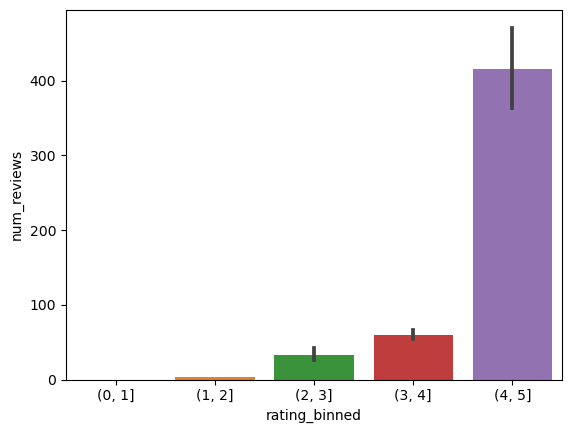

In [32]:
sns.barplot(x = data['rating_binned'] , y = data['num_reviews'])

<AxesSubplot:xlabel='rating_binned', ylabel='price_detail__amount'>

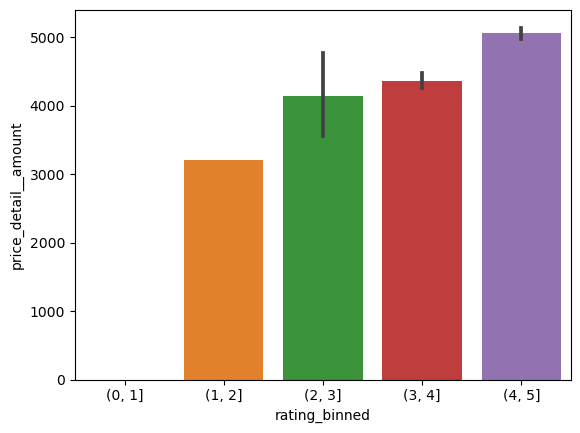

In [33]:
sns.barplot(x = data['rating_binned'] , y = data['price_detail__amount'])

<AxesSubplot:xlabel='rating_binned', ylabel='discount_price__amount'>

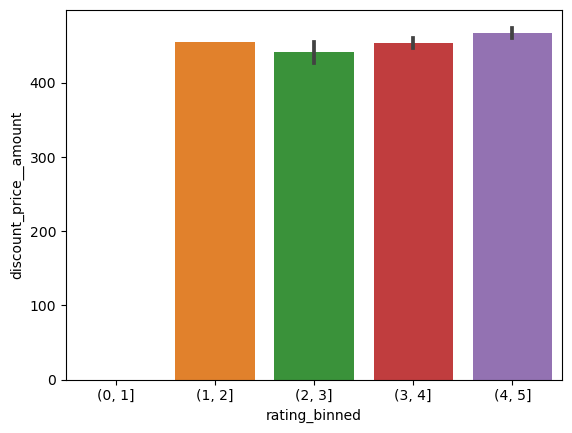

In [34]:
sns.barplot(x = data['rating_binned'] , y = data['discount_price__amount'])

In [35]:
#We have the Highest number of subscribers for rating between 4 to 5 having highest reviews also. We can see that people tend to review less to those with less rating.

correlated_data = ['num_subscribers', 'avg_rating_recent', 'num_reviews','num_published_lectures', 'price_detail__amount','discount_price__amount','num_published_practice_tests']


<AxesSubplot:>

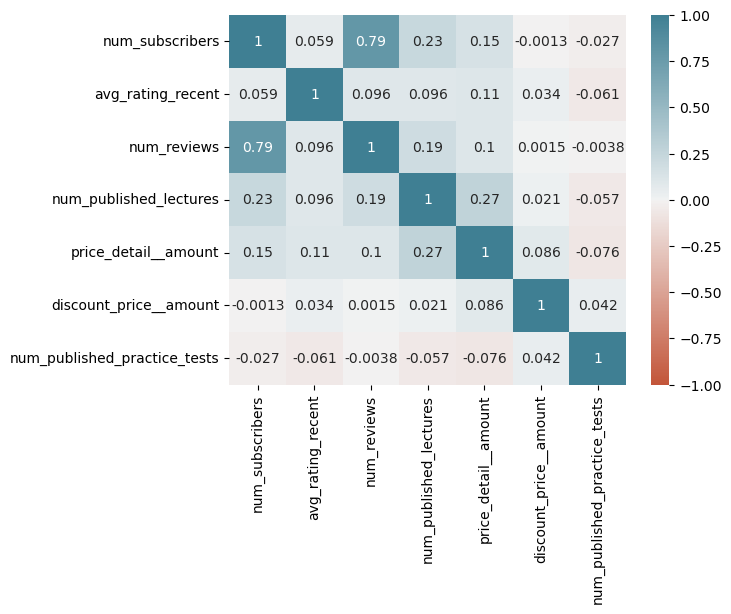

In [36]:
sns.heatmap(data[correlated_data].corr(),annot=True,cmap=sns.diverging_palette(20, 220, as_cmap=True),vmin=-1, vmax=1)

<AxesSubplot:xlabel='num_subscribers', ylabel='num_reviews'>

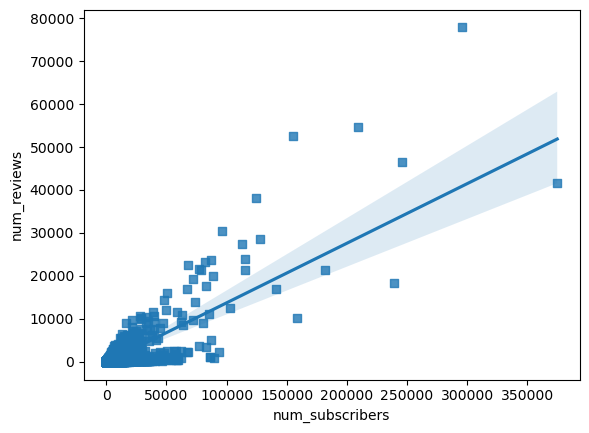

In [37]:
#We find a relation between (Number of Subscribers) and (Number of Reviews),which is the strongest of all.
#num_published_lectures/price_detail_amount - It shows a tendency of increasing prices as the the courses length increases
#num_subscribers and num_published_lectures has the third highest relation.

sns.regplot(x='num_subscribers', y='num_reviews', data=data, marker=',')

<AxesSubplot:xlabel='num_published_lectures', ylabel='price_detail__amount'>

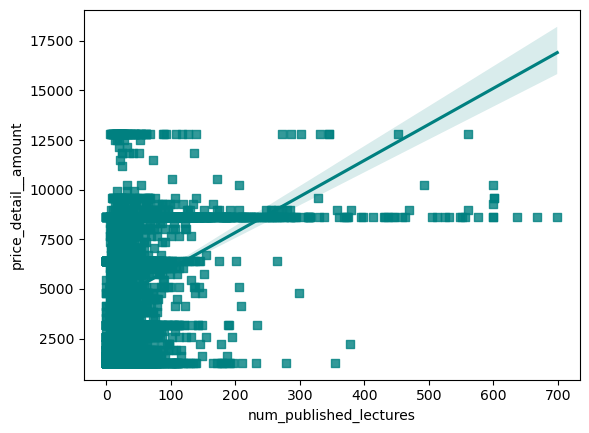

In [38]:
sns.regplot(x='num_published_lectures', y='price_detail__amount', data=data,marker=',', color='teal')

<AxesSubplot:xlabel='num_subscribers', ylabel='num_published_lectures'>

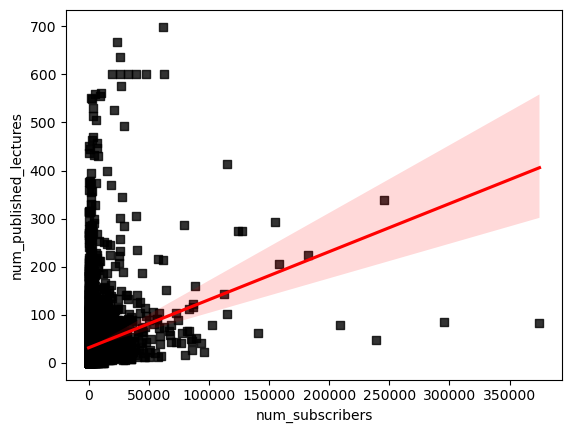

In [39]:
sns.regplot(x='num_subscribers', y='num_published_lectures', data=data, marker=',', scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [40]:
data['is_paid'].nunique()

1

In [41]:
data['is_wishlisted'].nunique()

1

In [42]:
#There is only Paid courses in the data.
#None of the courses were in wishlist.

detail_per_year = data.groupby('Year').agg({'num_subscribers':np.sum,'num_reviews':np.sum,'num_published_lectures':np.sum,'price_detail__amount':np.mean,"discount_price__amount":np.mean}).reset_index()
detail_per_year

,Year,num_subscribers,num_reviews,num_published_lectures,price_detail__amount,discount_price__amount
0,2011,25558,1538,375,3520.000000,460.000000
1,2012,112534,7493,1844,3190.000000,439.062500
2,2013,1125014,109286,9038,3800.131148,388.481967
3,2014,2535028,216911,21637,4043.250415,421.036484
4,2015,4755391,423724,44411,4467.027027,443.872019
5,2016,5888801,700476,37865,4825.612053,457.759887
6,2017,5740863,719934,46591,5126.360521,464.572995
7,2018,5096805,406263,70118,5196.634304,471.975189
8,2019,3230398,173739,51581,5135.088409,476.273739
9,2020,3158116,57860,37530,4717.730496,496.129433


Text(0.5, 1.0, 'Sum of Reviews')

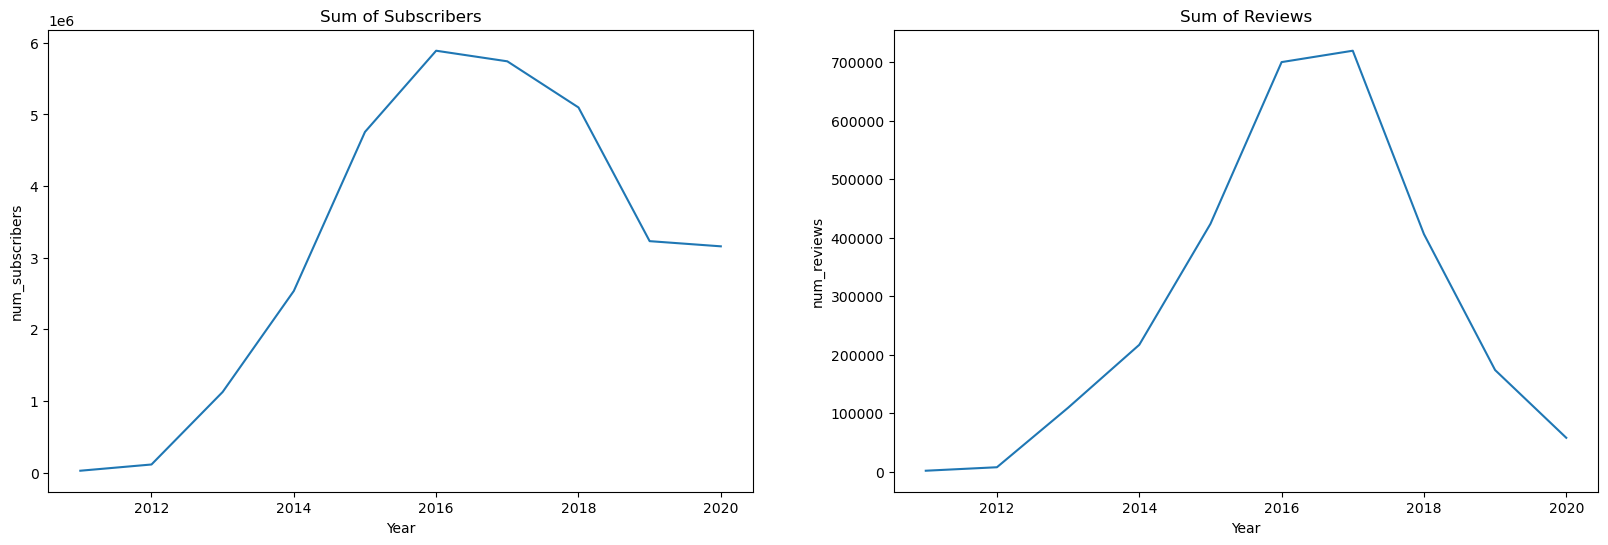

In [43]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x = 'Year',y = 'num_subscribers',data = detail_per_year,ax=ax[0])
ax[0].set_title('Sum of Subscribers')
sns.lineplot(x = 'Year',y = 'num_reviews',data = detail_per_year,ax=ax[1])
ax[1].set_title('Sum of Reviews')

Text(0.5, 1.0, 'Total Lectures')

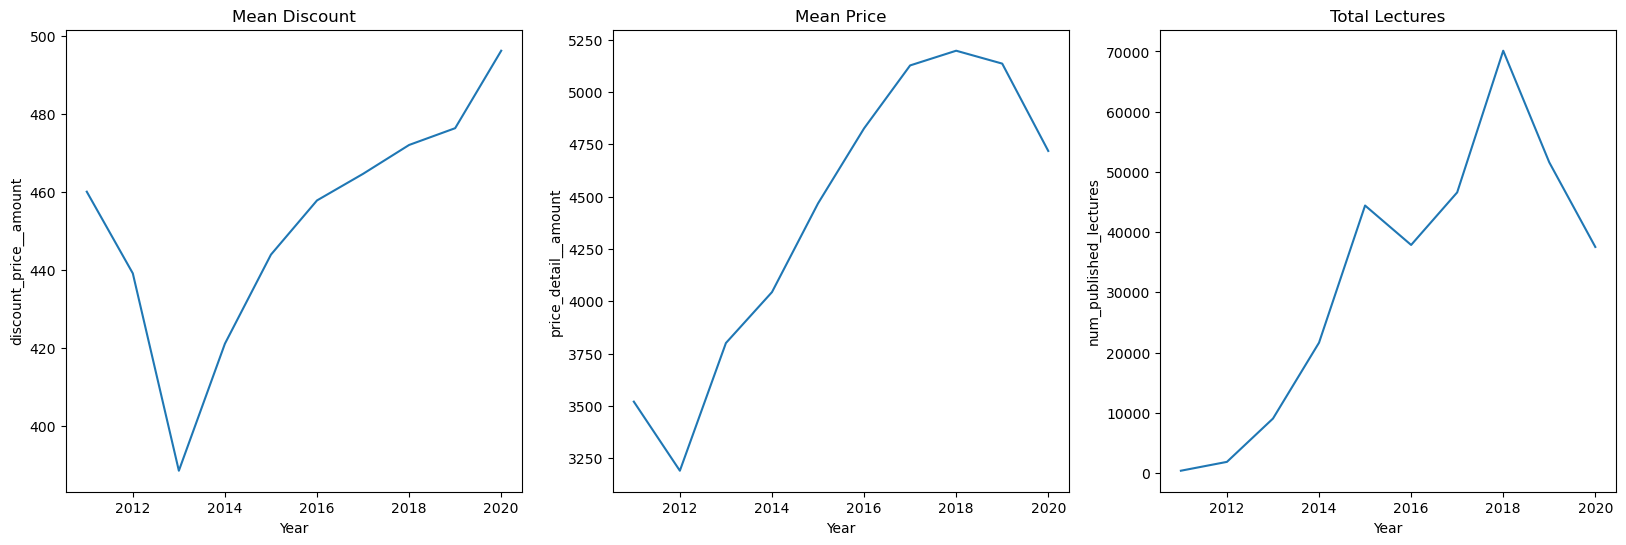

In [44]:
#There is a consistant rise in subscribers and reviews from 2012 to 2016.
#The subscribers and reviews are correlated.
#After 2016 onwards there is a decrease in subscribers and reviews.

fig, ax = plt.subplots(1,3,figsize=(20,6))
sns.lineplot(x = 'Year',y = 'discount_price__amount',data = detail_per_year,ax=ax[0])
ax[0].set_title('Mean Discount')
sns.lineplot(x = 'Year',y = 'price_detail__amount',data = detail_per_year,ax=ax[1])
ax[1].set_title('Mean Price')
sns.lineplot(x = 'Year',y = 'num_published_lectures',data = detail_per_year,ax=ax[2])
ax[2].set_title('Total Lectures')

In [45]:
#As the Average Price increases the Lectures also increase with the years till 2018.
#After 2018 there is a decrease in Average Price and the lectures, but there is a increase in average discount after 2018.

data[['title', 'num_subscribers', 'avg_rating','avg_rating_recent']].sort_values(by="num_subscribers", ascending=False).set_index('title')[:15]

,num_subscribers,avg_rating,avg_rating_recent
title,,,
An Entire MBA in 1 Course:Award Winning Business School Prof,374836,4.47080,4.47173
The Complete SQL Bootcamp 2020: Go from Zero to Hero,295509,4.66019,4.67874
The Complete Financial Analyst Course 2020,245860,4.54407,4.53772
Deep Learning Prerequisites: The Numpy Stack in Python (V2+),239309,4.47381,4.54005
Tableau 2020 A-Z: Hands-On Tableau Training for Data Science,209070,4.58956,4.60015
The Complete Financial Analyst Training & Investing Course,182002,4.49571,4.49507
The Complete Presentation and Public Speaking/Speech Course,158654,4.46745,4.44446
PMP Exam Prep Seminar - PMBOK Guide 6,155282,4.59491,4.59326
"Introduction to Finance, Accounting, Modeling and Valuation",140676,4.47580,4.46916


In [46]:
data['rating_diff'] = data['avg_rating_recent'] - data['avg_rating']
data

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,Year,rating_binned,rating_diff
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,False,84,0,02/14/2016,04/06/2016,455.0,8640,2016,"(4, 5]",0.01855
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,False,78,0,08/22/2016,08/23/2016,455.0,8640,2016,"(4, 5]",0.01059
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,False,292,2,09/26/2017,11/14/2017,455.0,8640,2017,"(4, 5]",-0.00165
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,False,338,0,10/23/2015,01/21/2016,455.0,8640,2016,"(4, 5]",-0.00635
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,False,83,0,10/12/2015,01/11/2016,455.0,8640,2016,"(4, 5]",0.00093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9441,2378286,Ten Steps to Sales Success,True,19,4.33333,4.49935,3,False,12,0,05/21/2019,08/06/2019,455.0,1600,2019,"(4, 5]",0.16602
9442,1934910,Simple Value Investing Guide With Proven Methods,True,1129,3.50000,3.43520,3,False,35,0,09/27/2018,10/31/2018,455.0,8640,2018,"(3, 4]",-0.06480
9444,1964000,Leadership Development:Ready To Use Tools to l...,True,1017,4.16667,3.88844,3,False,5,0,10/13/2018,10/27/2018,455.0,6400,2018,"(3, 4]",-0.27823
9445,2769588,Business Efficiency: How To Increase Workplace...,True,1716,3.66667,3.52632,3,False,7,0,01/20/2020,01/21/2020,455.0,6400,2020,"(3, 4]",-0.14035


In [47]:
new = data.drop('Year',axis = 1)
new

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,rating_binned,rating_diff
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,False,84,0,02/14/2016,04/06/2016,455.0,8640,"(4, 5]",0.01855
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,False,78,0,08/22/2016,08/23/2016,455.0,8640,"(4, 5]",0.01059
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,False,292,2,09/26/2017,11/14/2017,455.0,8640,"(4, 5]",-0.00165
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,False,338,0,10/23/2015,01/21/2016,455.0,8640,"(4, 5]",-0.00635
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,False,83,0,10/12/2015,01/11/2016,455.0,8640,"(4, 5]",0.00093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9441,2378286,Ten Steps to Sales Success,True,19,4.33333,4.49935,3,False,12,0,05/21/2019,08/06/2019,455.0,1600,"(4, 5]",0.16602
9442,1934910,Simple Value Investing Guide With Proven Methods,True,1129,3.50000,3.43520,3,False,35,0,09/27/2018,10/31/2018,455.0,8640,"(3, 4]",-0.06480
9444,1964000,Leadership Development:Ready To Use Tools to l...,True,1017,4.16667,3.88844,3,False,5,0,10/13/2018,10/27/2018,455.0,6400,"(3, 4]",-0.27823
9445,2769588,Business Efficiency: How To Increase Workplace...,True,1716,3.66667,3.52632,3,False,7,0,01/20/2020,01/21/2020,455.0,6400,"(3, 4]",-0.14035


In [48]:
new.to_excel('file.xlsx')
new.to_csv('new.csv')

In [49]:
sub = data[['title', 'num_subscribers', 'avg_rating','avg_rating_recent','rating_diff','num_published_lectures','price_detail__amount']].sort_values(by="num_subscribers", ascending=False).reset_index()[:20]
sub

,index,title,num_subscribers,avg_rating,avg_rating_recent,rating_diff,num_published_lectures,price_detail__amount
0,4,An Entire MBA in 1 Course:Award Winning Busine...,374836,4.47080,4.47173,0.00093,83,8640
1,0,The Complete SQL Bootcamp 2020: Go from Zero t...,295509,4.66019,4.67874,0.01855,84,8640
2,3,The Complete Financial Analyst Course 2020,245860,4.54407,4.53772,-0.00635,338,8640
3,19,Deep Learning Prerequisites: The Numpy Stack i...,239309,4.47381,4.54005,0.06624,47,1280
4,1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,209070,4.58956,4.60015,0.01059,78,8640
5,15,The Complete Financial Analyst Training & Inve...,182002,4.49571,4.49507,-0.00064,225,8640
6,35,The Complete Presentation and Public Speaking/...,158654,4.46745,4.44446,-0.02299,206,10240
7,2,PMP Exam Prep Seminar - PMBOK Guide 6,155282,4.59491,4.59326,-0.00165,292,8640
8,22,"Introduction to Finance, Accounting, Modeling ...",140676,4.47580,4.46916,-0.00664,61,9280
9,7,Beginner to Pro in Excel: Financial Modeling a...,127680,4.54034,4.53346,-0.00688,275,8640


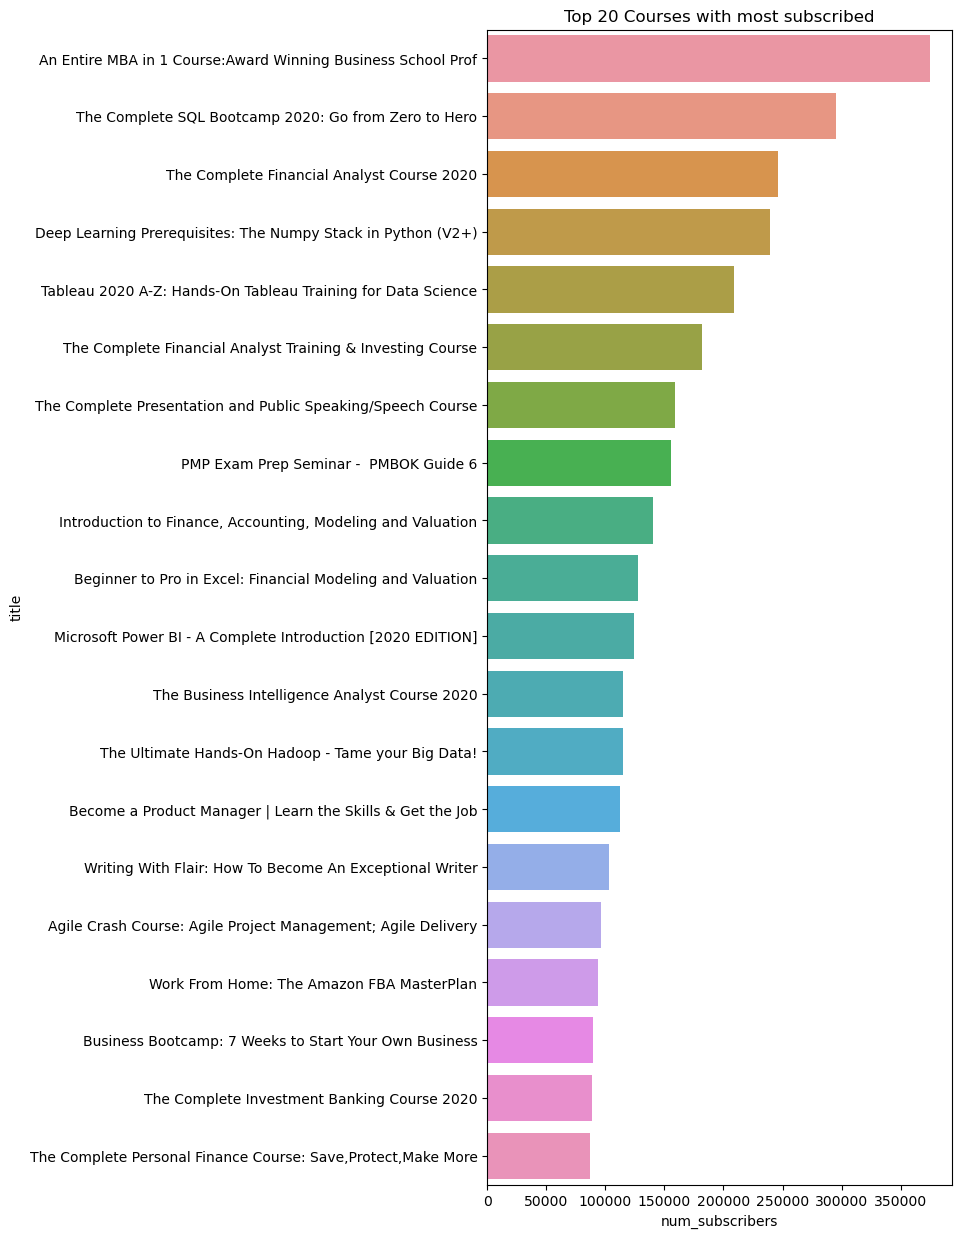

In [50]:
plt.figure(figsize=(6,15))
sns.barplot(x="num_subscribers",y ="title",data = sub)
plt.title('Top 20 Courses with most subscribed')
plt.show()

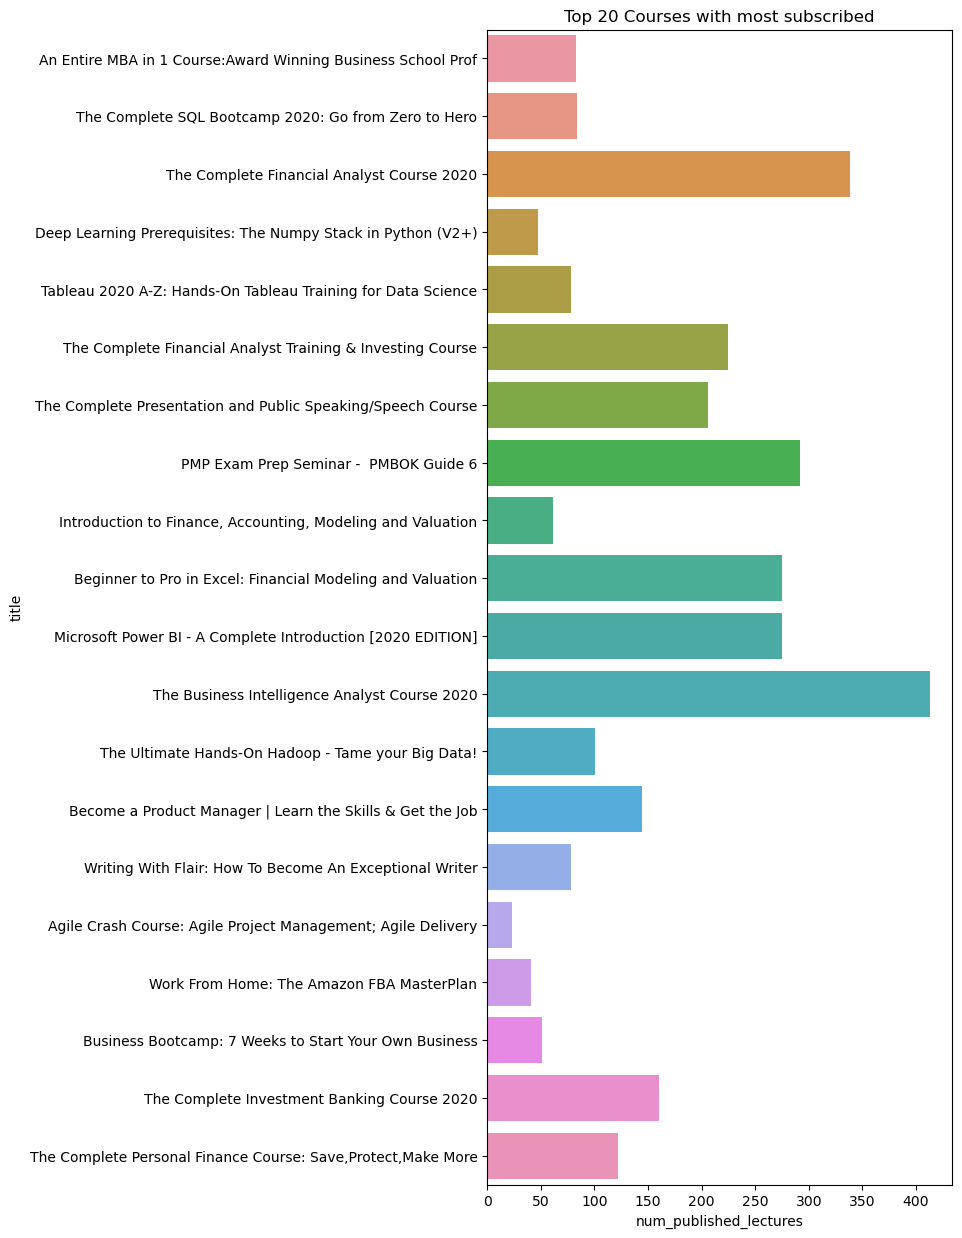

In [51]:
plt.figure(figsize=(6,15))
sns.barplot(x="num_published_lectures",y ="title",data = sub)
plt.title('Top 20 Courses with most subscribed')
plt.show()

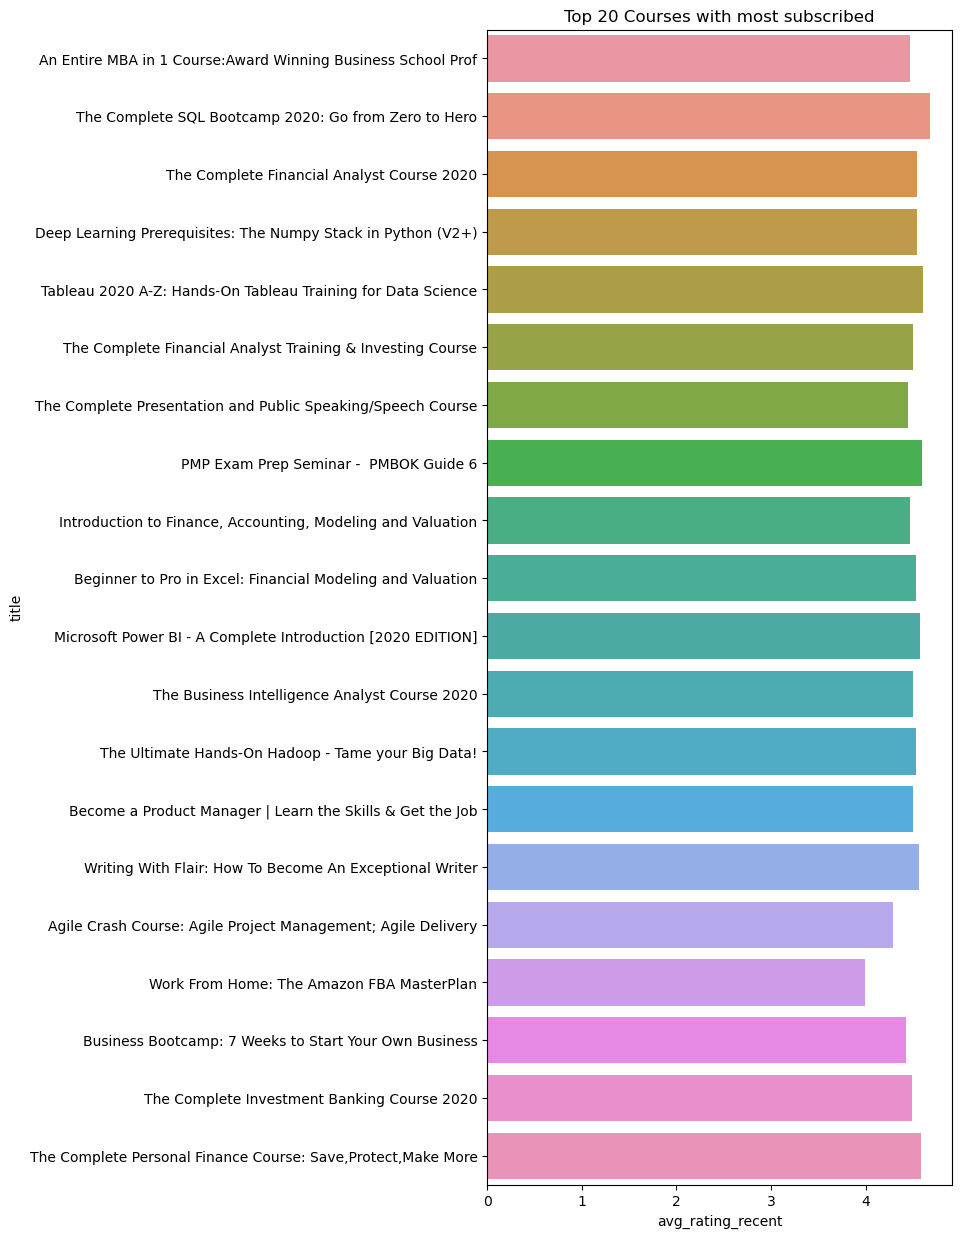

In [52]:
#We can see that the highest subscribed course is related to Financial(An Entire MBA in 1 Course:Award Winning Business School) but it doesnot have the max number of lectures (83).
#The maximum number of lectures to the course (The Business Intelligence Analyst Course 2020) which is 12th in the subscription rank and 2nd higest number lecture is in 3rd rak of subscription (The Complete Financial Analyst Course 2020).
#Most of the subscribed courses in top 20 belong to Financial and Data Science Category.

plt.figure(figsize=(6,15))
sns.barplot(x="avg_rating_recent",y ="title",data = sub)
plt.title('Top 20 Courses with most subscribed')
plt.show()

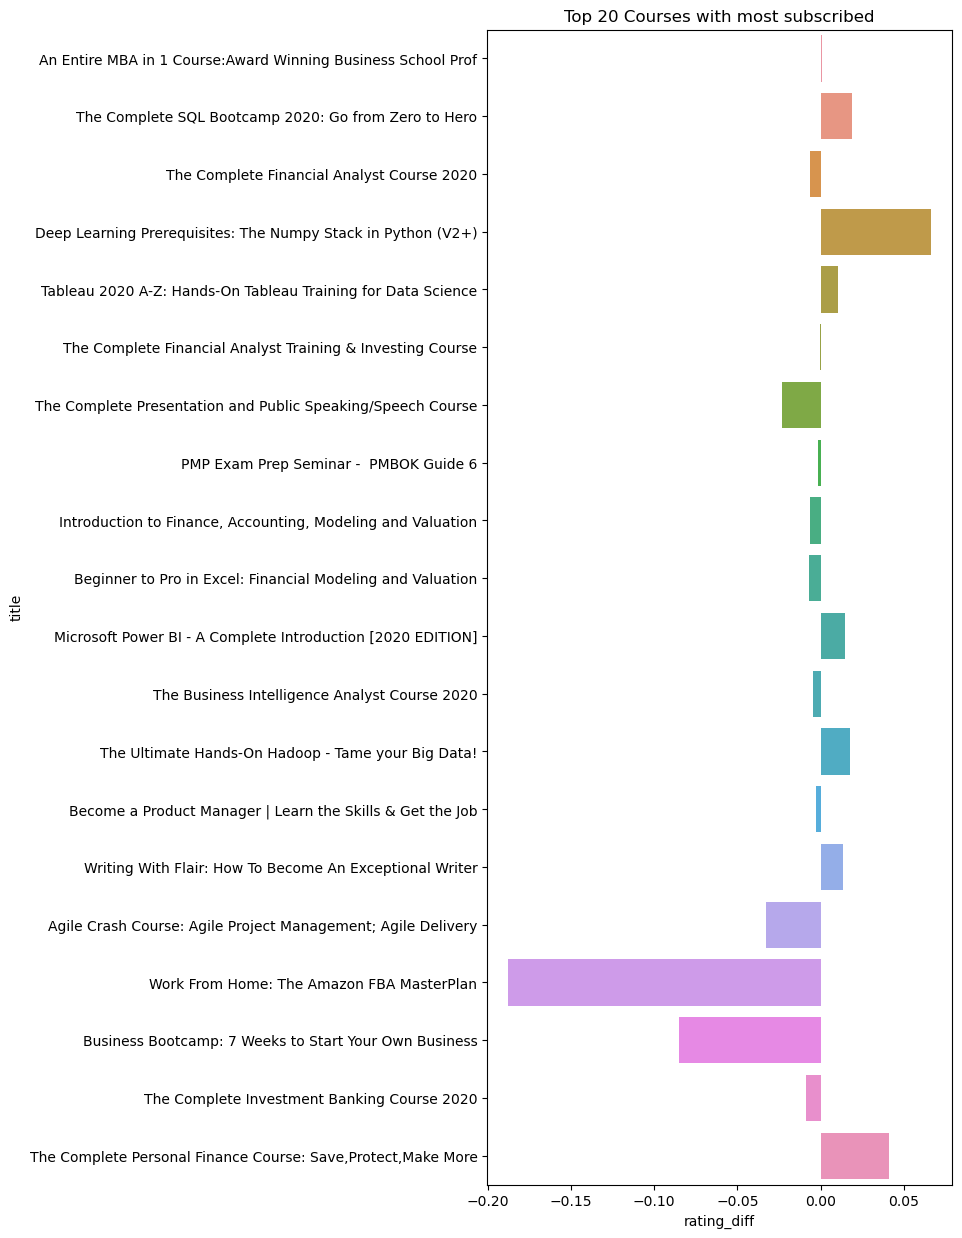

In [53]:

plt.figure(figsize=(6,15))
sns.barplot(x="rating_diff",y ="title",data = sub)
plt.title('Top 20 Courses with most subscribed')
plt.show()

In [54]:
#We can see that some of the ratings of courses have decreased.

data[['title', 'num_subscribers','published_time']].sort_values(by='published_time')

,title,num_subscribers,published_time
2563,Start a Business and Travel the World in 30 Days!,11547,01/01/2015
5256,How to Succeed in Business Without a College D...,1014,01/01/2015
311,Professional Life Coaching Certification PCELC...,9048,01/01/2016
704,Certification Stress Management Coaching CGRSC...,5375,01/01/2016
2496,FOREX : Learn Technical Analysis,1691,01/01/2016
...,...,...,...
2217,First Time Manager Course,2272,12/31/2019
8423,Convincing Clients in 5 Minutes,672,12/31/2019
5994,Luxury Travel Advisor | The Ultimate Lifestyle...,67,12/31/2019
1580,Forensic Accounting and Fraud Investigation,472,12/31/2019


In [55]:
data[['title', 'num_subscribers','published_time']].sort_values(by='published_time',ascending = False)

,title,num_subscribers,published_time
9119,Kindle Direct Publishing Self Publishing Low C...,123,12/31/2019
2217,First Time Manager Course,2272,12/31/2019
5994,Luxury Travel Advisor | The Ultimate Lifestyle...,67,12/31/2019
1580,Forensic Accounting and Fraud Investigation,472,12/31/2019
8423,Convincing Clients in 5 Minutes,672,12/31/2019
...,...,...,...
311,Professional Life Coaching Certification PCELC...,9048,01/01/2016
1240,How to Use Upwork to Make a Living: Freelance ...,6376,01/01/2016
921,Confidence Coaching Certification CGRCC Confid...,3569,01/01/2016
5256,How to Succeed in Business Without a College D...,1014,01/01/2015


In [56]:
data['title'].duplicated().sum()

21

In [ ]:
#By Comparing above two tables we can say that publish date doesn't guarentee the quality of lectures.